In [ ]:
# REQUERIMNIENTOS 
# !pip install requests openai

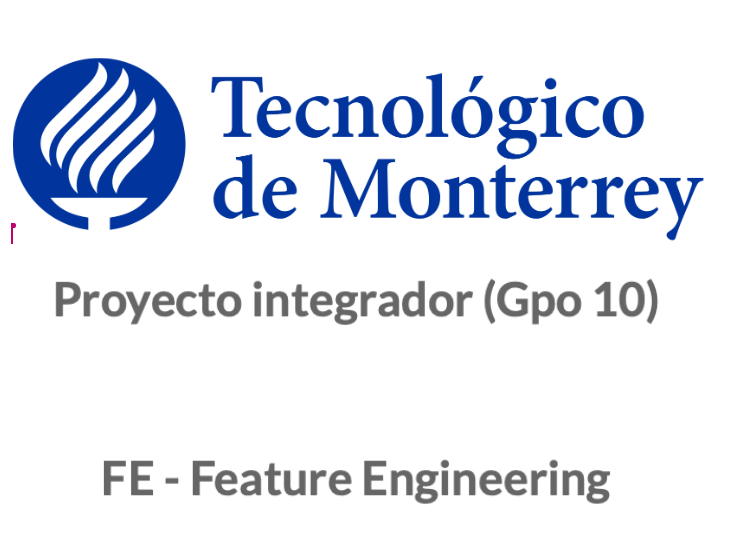

# Indice 

# 1. Importar librerias
# 2. Definir Configuraciones
# 3. Definir funciones

# Librerias

In [3]:
# Librerias 
from openai import OpenAI
from nltk.corpus import stopwords
import string
import os
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
import math


# Configuraciones

In [4]:
# Configuracion Open AI


client = OpenAI(
)

# Los paths varian la computadora, ya que se han corrido de manera local los notebooks, sin embargo
# Se pueden encontrar los datos en el repositorio de github y en google drive, asi como en sharepoint.

path_libro_completo = "/Users/santireycha/Desktop/CALIFORNIOS/LIBRO"
path_libro_capitulos = "/Users/santireycha/Desktop/CALIFORNIOS/LIBRO"
path_serie_completa = "/Users/santireycha/Desktop/CALIFORNIOS/SERIE"
path_serie_capitulos = "/Users/santireycha/Desktop/CALIFORNIOS/SERIE/temporada_1"

OpenAIError: The api_key client option must be set either by passing api_key to the client or by setting the OPENAI_API_KEY environment variable

# Funciones

In [ ]:
# Funciones

## Open Ai

def chat_gpt(prompt, modelo):
    response = client.chat.completions.create(
        model=f"{modelo}",
        messages=[{"role": "user", "content": prompt}]
    )
    return response.choices[0].message.content.strip()


## Procesamiento de lenguaje natural

# Leyendno la informacion y leer la cantidad de palabras
def contar_palabras(texto):
    # Contar la cantidad de palabras en el texto
    return len(texto.split())

# En el texto txt que se va a otorgan en el path /patn
def leer_archivo(path):
    with open(path, 'r') as file:
        contenido = file.read()
    return contenido

def separar_capitulos(texto):
    """
    Función para separar un texto en capítulos basados en la palabra clave 'Capítulo' o 'capitulo'.
    
    Args:
        texto (str): El texto completo que contiene los capítulos.
    
    Returns:
        list: Una lista donde cada elemento es un capítulo.
    """
    # Dividir el texto por la palabra clave 'Capítulo' (ignorando mayúsculas/minúsculas)
    capitulos = texto.split("Capítulo")
    
    # Agregar nuevamente la palabra 'Capítulo' al inicio de cada capítulo (excepto el primero)
    capitulos = [f"Capítulo{cap}" if i != 0 else cap for i, cap in enumerate(capitulos)]
    
    # Eliminar espacios en blanco innecesarios
    capitulos = [cap.strip() for cap in capitulos if cap.strip()]
    
    return capitulos


def cargar_y_procesar_capitulos(path):
    """
    Carga todos los capítulos desde un directorio, elimina stop words y asteriscos.

    Args:
        path (str): Ruta al directorio donde se encuentran los capítulos.

    Returns:
        dict: Un diccionario donde las claves son los nombres de los archivos y los valores son los textos procesados.
    """
    # Descargar stop words si es necesario
    try:
        stop_words = set(stopwords.words('spanish'))
    except LookupError:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words('spanish'))

    capitulos_procesados = {}

    # Iterar sobre los archivos en el directorio
    for filename in sorted(os.listdir(path)):
        if filename.startswith("Capitulo_") and filename.endswith(".txt"):
            filepath = os.path.join(path, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                texto = file.read()

                # Eliminar asteriscos
                texto = texto.replace('*', '')

                # Eliminar los gatitos
                texto = texto.replace('#', '')

                # Eliminar stop words
                palabras = texto.split()
                texto_procesado = ' '.join(
                    palabra for palabra in palabras if palabra.lower() not in stop_words
                )

                # Guardar el texto procesado
                capitulos_procesados[filename] = texto_procesado

    return capitulos_procesados


def cargar_y_procesar_capitulos_serie(path):
    """
    Carga todos los capítulos desde un directorio, elimina stop words y asteriscos.

    Args:
        path (str): Ruta al directorio donde se encuentran los capítulos.

    Returns:
        dict: Un diccionario donde las claves son los nombres de los archivos y los valores son los textos procesados.
    """
    # Descargar stop words si es necesario
    try:
        stop_words = set(stopwords.words('spanish'))
    except LookupError:
        import nltk
        nltk.download('stopwords')
        stop_words = set(stopwords.words('spanish'))

    capitulos_procesados = {}

    # Iterar sobre los archivos en el directorio
    for filename in sorted(os.listdir(path)):
        if filename.startswith("s1_ep") and filename.endswith(".txt"):
            filepath = os.path.join(path, filename)
            with open(filepath, 'r', encoding='utf-8') as file:
                texto = file.read()

                # Eliminar asteriscos
                texto = texto.replace('*', '')

                # Eliminar los gatitos
                texto = texto.replace('#', '')

                # Eliminar stop words
                palabras = texto.split()
                texto_procesado = ' '.join(
                    palabra for palabra in palabras if palabra.lower() not in stop_words
                )

                # Guardar el texto procesado
                capitulos_procesados[filename] = texto_procesado

    return capitulos_procesados

# Visualizacion de datos

def visualizar_conteo_palabras(capitulos_procesados):
    """
    Visualiza el conteo de palabras de los capítulos en 5 columnas.

    Args:
        capitulos_procesados (dict): Diccionario con los nombres de los capítulos como claves
                                     y el texto procesado como valores.
    """
    # Crear un DataFrame con el conteo de palabras
    data = {
        "Capítulo": list(capitulos_procesados.keys()),
        "Conteo de Palabras": [len(texto.split()) for texto in capitulos_procesados.values()]
    }
    df = pd.DataFrame(data)

    # Configurar la visualización
    fig, ax = plt.subplots(figsize=(15, 8))
    df["Columna"] = (df.index // 5) + 1  # Dividir en 5 columnas
    grouped = df.groupby("Columna")

    # Crear subgráficos para cada columna
    for col, group in grouped:
        ax.bar(group["Capítulo"], group["Conteo de Palabras"], label=f"Columna {col}")

    # Configurar etiquetas y título
    ax.set_xlabel("Capítulos")
    ax.set_ylabel("Conteo de Palabras")
    ax.set_title("Conteo de Palabras por Capítulo")
    ax.legend()
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()


def visualizar_wordclouds(capitulos_procesados, columnas=5):
    """
    Genera una visualización de nubes de palabras (word clouds) para cada capítulo,
    organizadas en una cuadrícula de 5 columnas.

    Args:
        capitulos_procesados (dict): Diccionario con los nombres de los capítulos como claves
                                     y el texto procesado como valores.
        columnas (int): Número de columnas en la cuadrícula de visualización.
    """
    # Número total de capítulos
    total_capitulos = len(capitulos_procesados)
    
    # Calcular el número de filas necesarias
    filas = math.ceil(total_capitulos / columnas)
    
    # Crear la figura
    fig, axes = plt.subplots(filas, columnas, figsize=(20, 4 * filas))
    axes = axes.flatten()  # Aplanar los ejes para iterar fácilmente
    
    # Generar un word cloud para cada capítulo
    for idx, (capitulo, texto) in enumerate(capitulos_procesados.items()):
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(texto)
        
        # Dibujar el word cloud en el subplot correspondiente
        axes[idx].imshow(wordcloud, interpolation='bilinear')
        axes[idx].set_title(capitulo, fontsize=12)
        axes[idx].axis('off')  # Ocultar los ejes
    
    # Ocultar los subplots vacíos si hay menos capítulos que subplots
    for idx in range(total_capitulos, len(axes)):
        axes[idx].axis('off')
    
    # Ajustar el diseño
    plt.tight_layout()
    plt.show()


# **Analisis de Libro**


In [2]:
# En la siguiente seccion se realizaran multiples llamadas a los LLM las cuales, se busca extraer los caracteres importantes por cada 
# capitulo del libro, no obstante no se busca encontrar cuiestiones de texto, mas bien, se busca resunmir
# hen cuento a la historia y el desarrollo qe han tenido los personakes a lo largo de la historia.

# Resumen de historia

In [ ]:
# Crear Resumenes de los capitulos
# a un archivo txt


#  Leyendo los capitulos previamente separados en el eda
capitulos_procesados_libro = cargar_y_procesar_capitulos(path_libro_capitulos)

capitulos_procesados_libro_ordenados = dict(
    sorted(
        capitulos_procesados_libro.items(),
        key=lambda item: int(item[0].split('_')[1][2:].split('.')[0])  # Extraer el número después de 'ep'
    )
)

# Prompt elegido para la tarea: 
prompt = "Resume el siguiente capítulo del libro, cuenta de manera simple, que ha pasado con los personajes, que ha sucedido ?"
modelo = "gpt-4o"

for capitulo in capitulos_procesados_libro_ordenados:

    respuesta = chat_gpt(prompt, modelo)

    # Guardamos el formato
    with open(path_libro_capitulos + f"/resumen_cap_{capitulos_procesados_libro_ordenados.index(capitulo) + 1}.txt", 'w') as file:
        file.write(respuesta)


# Resumen Contextual

In [ ]:
# Crear Resumenes de los capitulos
# a un archivo txt


#  Leyendo los capitulos previamente separados en el eda
capitulos_procesados_libro = cargar_y_procesar_capitulos(path_libro_capitulos)

capitulos_procesados_libro_ordenados = dict(
    sorted(
        capitulos_procesados_libro.items(),
        key=lambda item: int(item[0].split('_')[1][2:].split('.')[0])  # Extraer el número después de 'ep'
    )
)

# Prompt elegido para la tarea: 
prompt = "Resume, de acuerdo al siguiente capítulo del libro, cuenta que personajes se encuentran en la historia, realiza una lista de los personajes, acciones que tuvieron lugar."
modelo = "gpt-4o"

for capitulo in capitulos_procesados_libro_ordenados:

    respuesta = chat_gpt(prompt, modelo)

    # Guardamos el formato
    with open(path_libro_capitulos + f"/resumen_cap_cont{capitulos_procesados_libro_ordenados.index(capitulo) + 1}.txt", 'w') as file:
        file.write(respuesta)


-----

# **Analisis de Serie**


In [ ]:
# En la siguiente seccion se realizaran multiples llamadas a los LLM las cuales, se busca extraer los caracteres importantes por cada 
# capitulo del la serie, no obstante no se busca encontrar cuiestiones de texto, mas bien, se busca resunmir
# hen cuento a la historia y el desarrollo qe han tenido los personakes a lo largo de la historia.


# El objetivo de analizar la serie, nos permite a nosotros evaluar manualmente que aspectos de la serie
# llevan en cuanto al libro, a pesar de haber creado una correlacion

# Resumen de historia

In [ ]:
# Crear Resumenes de los capitulos
# a un archivo txt


#  Leyendo los capitulos previamente separados en el eda
capitulos_procesados_serie = cargar_y_procesar_capitulos_serie(path_serie_capitulos)

capitulos_procesados_serie_ordenados = dict(
    sorted(
        capitulos_procesados_serie.items(),
        key=lambda item: int(item[0].split('_')[1][2:].split('.')[0])  # Extraer el número después de 'ep'
    )
)

# Prompt elegido para la tarea: 
prompt = "Resume el siguiente capítulo del libro, cuenta de manera simple, que ha pasado con los personajes, que ha sucedido ?"
modelo = "gpt-4o"

for capitulo in capitulos_procesados_serie_ordenados:

    respuesta = chat_gpt(prompt, modelo)

    # Guardamos el formato
    with open(path_serie_capitulos + f"/resumen_cap_{capitulos_procesados_serie_ordenados.index(capitulo) + 1}.txt", 'w') as file:
        file.write(respuesta)


# Resumen Contextual

In [ ]:
# Crear Resumenes de los capitulos
# a un archivo txt


#  Leyendo los capitulos previamente separados en el eda
capitulos_procesados_serie = cargar_y_procesar_capitulos(path_serie_capitulos)

capitulos_procesados_serie_ordenados = dict(
    sorted(
        capitulos_procesados_serie.items(),
        key=lambda item: int(item[0].split('_')[1][2:].split('.')[0])  # Extraer el número después de 'ep'
    )
)

# Prompt elegido para la tarea: 
prompt = "Resume, de acuerdo al siguiente capítulo del libro, cuenta que personajes se encuentran en la historia, realiza una lista de los personajes, acciones que tuvieron lugar."
modelo = "gpt-4o"

for capitulo in capitulos_procesados_serie_ordenados:

    respuesta = chat_gpt(prompt, modelo)

    # Guardamos el formato
    with open(path_serie_capitulos + f"/resumen_cap_cont{capitulos_procesados_serie_ordenados.index(capitulo) + 1}.txt", 'w') as file:
        file.write(respuesta)


# Salida de los resumenes se encuentran de esta manera y en drive 

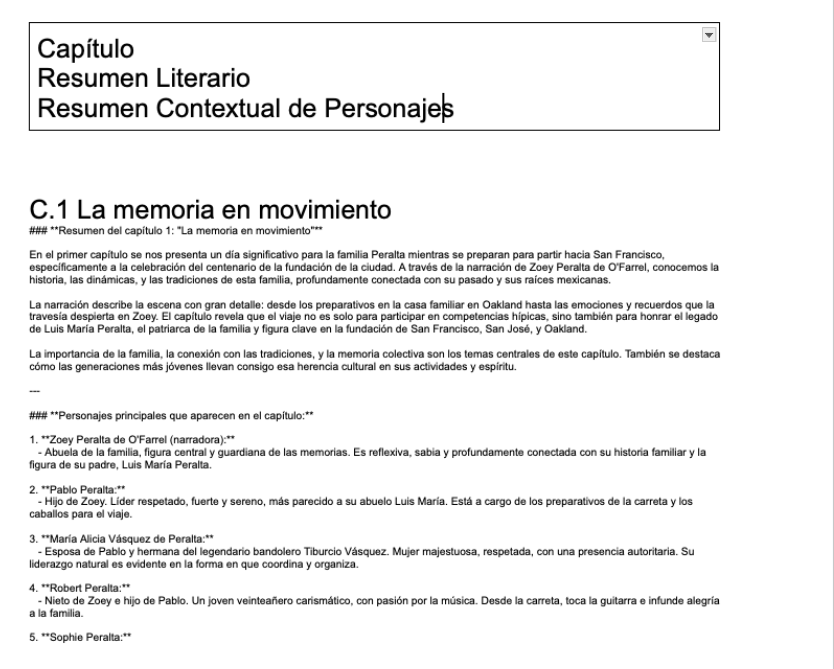

Explicación del modelo:  

El modelo GPT-4 fue elegido debido a su capacidad avanzada para comprender texto en profundidad, identificar implicancias contextuales en las historias, y estructurar resúmenes claros y útiles. Este modelo es particularmente adecuado para tareas de análisis literario gracias a su habilidad para captar tanto los aspectos textuales como subtextuales de una obra. Utilizando comandos ("prompts") específicos, fue posible generar resúmenes estructurados que se adaptan a las necesidades del análisis dual (historia y personajes) planteado en este documento.


Drive: https://docs.google.com/document/d/1TpOw2zCKSGVX_C3qaXRVm4qELDpj8mLLfeDxh5Qhb7U/edit?tab=t.0